In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Build a prediction model for Salary_hike
input=yearsExperience    ,
output= salary
-

In [4]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## inital analysis

In [5]:
salary_data.shape

(30, 2)

In [6]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Assumptions ->->-> check

### 1. check for linearity

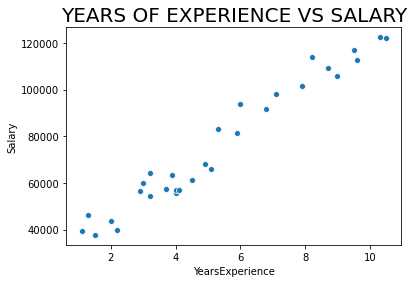

In [9]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YEARS OF EXPERIENCE VS SALARY',size=20)
plt.show()

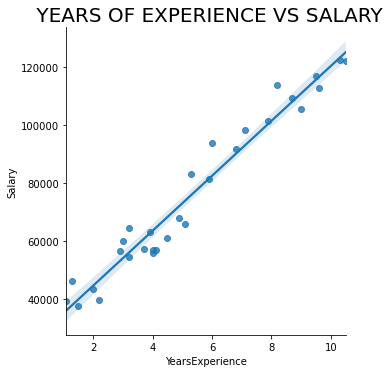

In [10]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title(' YEARS OF EXPERIENCE VS SALARY',size=20)
plt.show()

## our data is linearily related ---> assumption pass

### check for normality

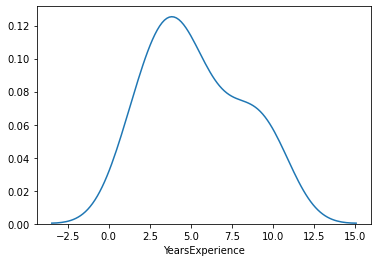

In [11]:
sns.distplot( salary_data['YearsExperience'],hist=False)

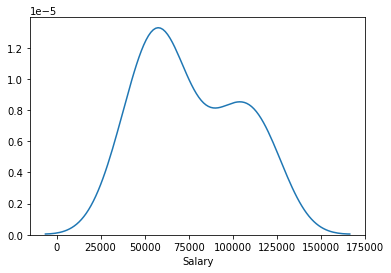

In [12]:
sns.distplot( salary_data['Salary'],hist=False)

#####  some what it is normally distributed

# corrilation

In [13]:
 salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### it is 97.8  percent corrilated-----> means data is highly corrilated

### no multicollinarity :-> as there in only one input ,so no dependency between the input variable

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [14]:
import statsmodels.formula.api as smf

In [15]:
 salary_model=smf.ols('Salary ~ YearsExperience',data= salary_data).fit()## model training and building is done

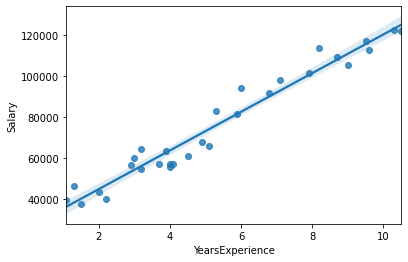

In [16]:
sns.regplot(x="YearsExperience", y="Salary", data= salary_data)
plt.show()

## model evaluation

In [17]:
# coefficients
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
salary_model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [19]:
#R squared values
(salary_model.rsquared,salary_model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## here we can see that r2 and aj_r2 is contributing 95.6 and 95.5 respectively ,that is quite high

In [20]:
salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        22:33:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  manual testing

In [21]:
# coefficients
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:

 x=11


9449.962321*11+ 25792.200199






129741.78573

In [23]:

 x=11.5
9449.962321*11.5+ 25792.200199


134466.7668905

In [24]:

 x=12
    
9449.962321*12+ 25792.200199


139191.748051

In [25]:

 x=12.5


9449.962321*12.5+ 25792.200199




143916.72921150003

In [26]:

 x=13

9449.962321*13+ 25792.200199



148641.710372

### model testing

In [27]:
#Predict for 11,12,13,14,15 sorting times
newdata=pd.Series([11,11.5,12,12.5,13])

In [28]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [29]:
salary_model.predict(data_pred)

0    129741.785735
1    134466.766895
2    139191.748056
3    143916.729217
4    148641.710378
dtype: float64

 ### so our manul testing is matched with machine testing so we can say that the model is performing right

In [30]:
from statsmodels.graphics.regressionplots import influence_plot

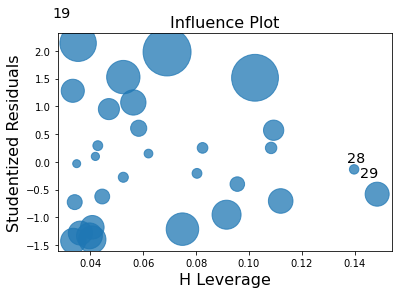

In [31]:
influence_plot(salary_model)
plt.show()


In [32]:
import warnings
warnings.filterwarnings('ignore')

### checking for outliers with the help of cooks distance

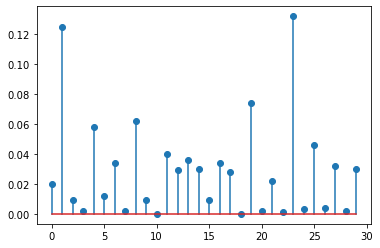

In [33]:
salary_model_influence=salary_model.get_influence()
(c,_)=salary_model_influence.cooks_distance
# plot the influence values using stem plot
#fig=plt.subplot(fig size=(20,7))
plt.stem(np.arange(len(salary_data)),np.round(c,3))
#plt.xlable('Row index')
#plt.ylable('cooks distance')
plt.show()

##  removing outliers from our data to give more contribution

In [34]:
salary_data1=salary_data.drop(axis=0,index=[1,23])
salary_data1     ,salary_data1.shape

(    YearsExperience    Salary
 0               1.1   39343.0
 2               1.5   37731.0
 3               2.0   43525.0
 4               2.2   39891.0
 5               2.9   56642.0
 6               3.0   60150.0
 7               3.2   54445.0
 8               3.2   64445.0
 9               3.7   57189.0
 10              3.9   63218.0
 11              4.0   55794.0
 12              4.0   56957.0
 13              4.1   57081.0
 14              4.5   61111.0
 15              4.9   67938.0
 16              5.1   66029.0
 17              5.3   83088.0
 18              5.9   81363.0
 19              6.0   93940.0
 20              6.8   91738.0
 21              7.1   98273.0
 22              7.9  101302.0
 24              8.7  109431.0
 25              9.0  105582.0
 26              9.5  116969.0
 27              9.6  112635.0
 28             10.3  122391.0
 29             10.5  121872.0,
 (28, 2))

## Assumptions ->->-> check

### 1. check for linearity

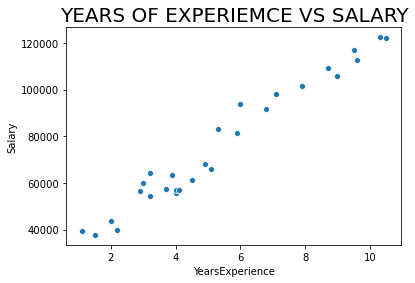

In [35]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_data1)
plt.title('YEARS OF EXPERIEMCE VS SALARY',size=20)
plt.show()

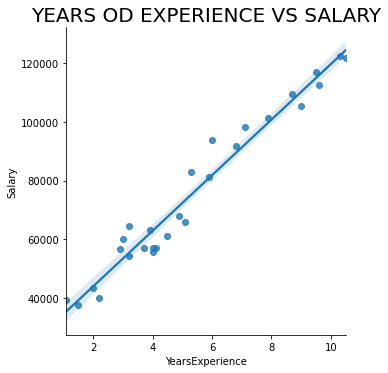

In [36]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data1)
plt.title('YEARS OD EXPERIENCE VS SALARY',size=20)
plt.show()

####  data is linear

### check for normality

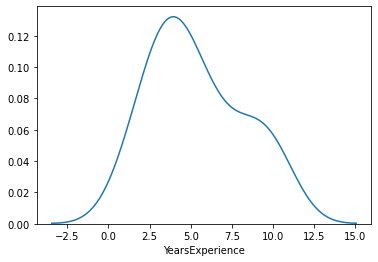

In [37]:
sns.distplot( salary_data1['YearsExperience'],hist=False)

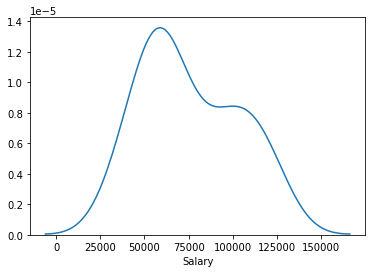

In [38]:
sns.distplot( salary_data1['Salary'],hist=False)

##### it is normaily distributed 

In [39]:
 salary_data1.corr()

,YearsExperience,Salary
YearsExperience,1.00000,0.98059
Salary,0.98059,1.00000


### it is 98 percent corrilated

### no multicollinarity :-> as there in only one input ,so no dependency between the input variable

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [40]:
import statsmodels.formula.api as smf

In [41]:
 salary_model1=smf.ols('Salary ~ YearsExperience',data= salary_data1).fit()## model training and building is done

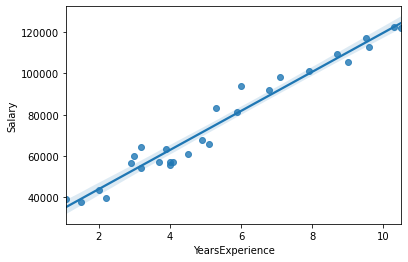

In [42]:
sns.regplot(x="YearsExperience", y="Salary", data= salary_data1)
plt.show()

## model evaluation

In [43]:
# coefficients
salary_model1.params

Intercept          25049.700325
YearsExperience     9464.185396
dtype: float64

In [44]:
salary_model1.pvalues

Intercept          1.797931e-11
YearsExperience    6.323531e-20
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [45]:
#R squared values
(salary_model1.rsquared,salary_model1.rsquared_adj)

(0.9615558970834558, 0.9600772777405118)

In [46]:
salary_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     650.3
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           6.32e-20
Time:                        22:33:34   Log-Likelihood:                -279.15
No. Observations:                  28   AIC:                             562.3
Df Residuals:                      26   BIC:                             565.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.505e+04   2230.710     11.229      0.000    2.05e+04    2.96e+04
YearsExperience  9464.1854    371.128     25.501      0.000    8701.320    1.02e+04
==============================================================================
Omnibus:                        1.375   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.290
Skew:                           0.445   Prob(JB):                        0.525
Kurtosis:                       2.439   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  manual testing

In [47]:
# coefficients
salary_model1.params

Intercept          25049.700325
YearsExperience     9464.185396
dtype: float64

In [48]:

 x=11

9464.185396*11+ 25049.700325


129155.739681

In [49]:

 x=11.5

9464.185396*11.5+ 25049.700325


133887.83237900003

In [50]:

 x=12
    
9464.185396*12+ 25049.700325


138619.92507700002

In [51]:

 x=12.5



9464.185396*12.5+ 25049.700325



143352.01777500001

In [52]:

 x=13


9464.185396*13+ 25049.700325


148084.110473

### model testing

In [53]:
#Predict for 11,12,13,14,15 sorting times
newdata=pd.Series([11,11.5,12,12.5,13])

In [54]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [55]:
salary_model1.predict(data_pred)

0    129155.739683
1    133887.832382
2    138619.925080
3    143352.017778
4    148084.110476
dtype: float64

In [56]:
from statsmodels.graphics.regressionplots import influence_plot

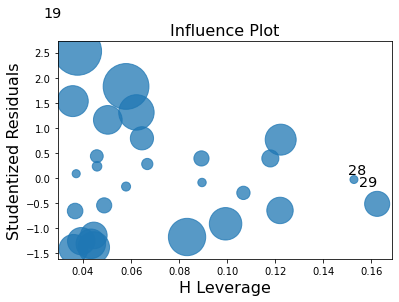

In [57]:
influence_plot(salary_model1)
plt.show()


In [58]:
import warnings
warnings.filterwarnings('ignore')

### checking for outliers with the help of cooks distance

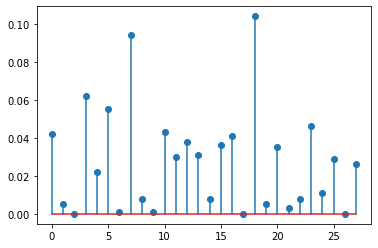

In [59]:
salary_model1_influence=salary_model1.get_influence()
(c,_)=salary_model1_influence.cooks_distance
# plot the influence values using stem plot
#fig=plt.subplot(fig size=(20,7))
plt.stem(np.arange(len(salary_data1)),np.round(c,3))
#plt.xlable('Row index')
#plt.ylable('cooks distance')
plt.show()

### ->=======================================================================================

## model improvment technique using log 

In [60]:
import numpy as np

In [64]:
np.log(salary_data['YearsExperience'])
np.log(salary_data['Salary'])

0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: Salary, dtype: float64

In [66]:
salary_data['log_YearsExperience']=np.log(salary_data['YearsExperience'])
salary_data['log_Salary']=np.log(salary_data['Salary'])
salary_data

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


## inital analysis

In [67]:
salary_data.shape

(30, 4)

In [68]:
salary_data.isna().sum()

YearsExperience        0
Salary                 0
log_YearsExperience    0
log_Salary             0
dtype: int64

In [69]:
salary_data.dtypes

YearsExperience        float64
Salary                 float64
log_YearsExperience    float64
log_Salary             float64
dtype: object

In [70]:
salary_data.describe()

,YearsExperience,Salary,log_YearsExperience,log_Salary
count,30.000000,30.000000,30.000000,30.000000
mean,5.313333,76003.000000,1.504979,11.173975
std,2.837888,27414.429785,0.624233,0.368787
min,1.100000,37731.000000,0.095310,10.538237
25%,3.200000,56720.750000,1.163151,10.945892
50%,4.700000,65237.000000,1.546656,11.085708
75%,7.700000,100544.750000,2.040171,11.518272
max,10.500000,122391.000000,2.351375,11.714976


## Assumptions ->->-> check

### 1. check for linearity

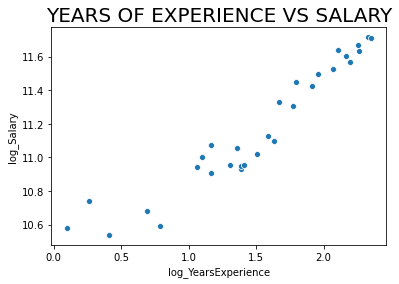

In [71]:
sns.scatterplot(x='log_YearsExperience',y='log_Salary',data=salary_data)
plt.title('YEARS OF EXPERIENCE VS SALARY',size=20)
plt.show()

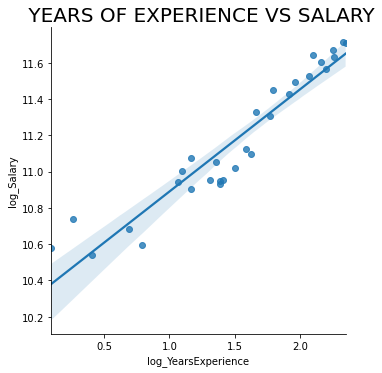

In [72]:
sns.lmplot(x='log_YearsExperience',y='log_Salary',data=salary_data)
plt.title(' YEARS OF EXPERIENCE VS SALARY',size=20)
plt.show()

## our data is linearily related ---> assumption pass

### check for normality

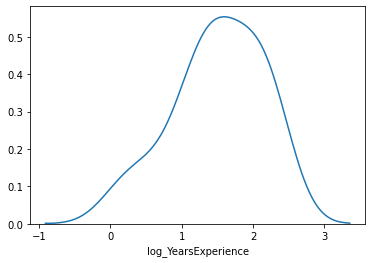

In [73]:
sns.distplot( salary_data['log_YearsExperience'],hist=False)

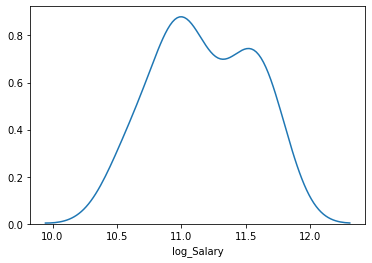

In [74]:
sns.distplot( salary_data['log_Salary'],hist=False)

#####  some what it is normally distributed

# corrilation

In [75]:
 salary_data.corr()

,YearsExperience,Salary,log_YearsExperience,log_Salary
YearsExperience,1.000000,0.978242,0.953797,0.965384
Salary,0.978242,1.000000,0.924061,0.988531
log_YearsExperience,0.953797,0.924061,1.000000,0.951428
log_Salary,0.965384,0.988531,0.951428,1.000000


### it is 95  percent corrilated-----> means data is highly corrilated

### no multicollinarity :-> as there in only one input ,so no dependency between the input variable

# model building| model training 
as in stats model -> model building and training encounter at the same time

In [76]:
import statsmodels.formula.api as smf

In [77]:
 model2=smf.ols('log_Salary ~ log_YearsExperience',data= salary_data).fit()## model training and building is done

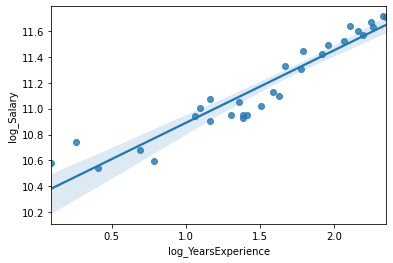

In [78]:
sns.regplot(x="log_YearsExperience", y="log_Salary", data= salary_data)
plt.show()

## model evaluation

In [79]:
# coefficients
model2.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [80]:
model2.pvalues

Intercept              9.073132e-45
log_YearsExperience    7.395278e-16
dtype: float64

## hypohesis formulation:-
H0= it is not a significant paramters   when>0.05  ,
Ha= it is significant parameters      when<0.05
### so we reject the null hypothesis as it is significant i.e pvalues<0.05

In [82]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

## here we can see that r2 and aj_r2 is contributing 95.6 and 95.5 respectively ,that is quite high

In [83]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           7.40e-16
Time:                        22:45:49   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.3280      0.056    184.868      0.000      10.214      10.442
log_YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  manual testing

In [84]:
# coefficients
model2.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [85]:

 x=11


 0.562089*11+10.328043








16.511021999999997

In [86]:

 x=11.5
 0.562089*11.5+10.328043


16.792066499999997

In [87]:

 x=12
    
 0.562089*12+10.328043

17.073110999999997

In [88]:

 x=12.5


 0.562089*12.5+10.328043




17.354155499999997

In [89]:

 x=13


 0.562089*13+10.328043

17.635199999999998

### model testing

In [93]:
#Predict for 11,12,13,14,15 sorting times
newdata=pd.Series([11,11.5,12,12.5,13])

In [94]:
data_pred=pd.DataFrame(newdata,columns=['log_YearsExperience'])

In [95]:
model2.predict(data_pred)

0    16.511020
1    16.792065
2    17.073109
3    17.354154
4    17.635198
dtype: float64

 ### so our manul testing is matched with machine testing so we can say that the model is performing right

In [96]:
from statsmodels.graphics.regressionplots import influence_plot

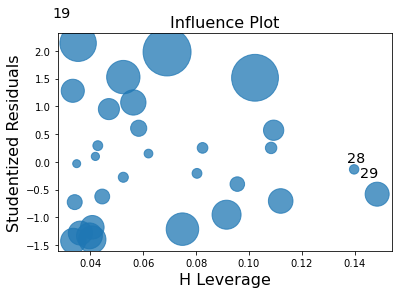

In [97]:
influence_plot(salary_model)
plt.show()


In [98]:
import warnings
warnings.filterwarnings('ignore')

### checking for outliers with the help of cooks distance

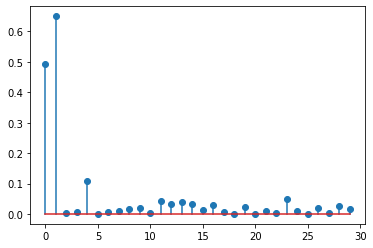

In [100]:
model2_influence=model2.get_influence()
(c,_)=model2_influence.cooks_distance
# plot the influence values using stem plot
#fig=plt.subplot(fig size=(20,7))
plt.stem(np.arange(len(salary_data)),np.round(c,3))
#plt.xlable('Row index')
#plt.ylable('cooks distance')
plt.show()

In [101]:
salary_data.drop(axis=0,index=[0,1],inplace=True)

In [103]:
salary_data.shape

(28, 4)

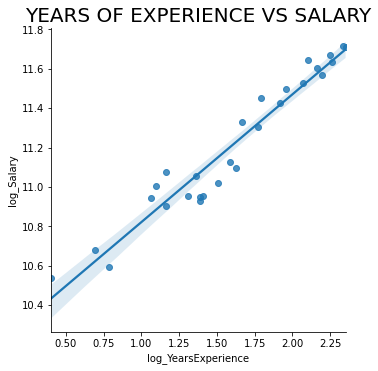

In [106]:
sns.lmplot(x='log_YearsExperience',y='log_Salary',data=salary_data)
plt.title('YEARS OF EXPERIENCE VS SALARY',size=20)
plt.show()

In [107]:
salary_data.corr()# 96

,YearsExperience,Salary,log_YearsExperience,log_Salary
YearsExperience,1.000000,0.977978,0.968402,0.960741
Salary,0.977978,1.000000,0.951926,0.988787
log_YearsExperience,0.968402,0.951926,1.000000,0.969900
log_Salary,0.960741,0.988787,0.969900,1.000000


# model building| model training 
as in stats model -> model building and training encounter at the same time

In [115]:
import statsmodels.formula.api as smf

In [116]:
 model3=smf.ols('log_Salary ~ log_YearsExperience',data= salary_data).fit()## model training and building is done

In [117]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           1.79e-17
Time:                        22:57:47   Log-Likelihood:                 29.482
No. Observations:                  28   AIC:                            -54.96
Df Residuals:                      26   BIC:                            -52.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.1724      0.054    189.316      0.000      10.062      10.283
log_YearsExperience     0.6490      0.032     20.310      0.000       0.583       0.715
==============================================================================
Omnibus:                        2.525   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                1.365
Skew:                          -0.195   Prob(JB):                        0.505
Kurtosis:                       1.991   Cond. No.                         7.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
y=salary_data['log_Salary']
y

2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: log_Salary, dtype: float64

In [138]:
x=salary_data['log_YearsExperience']
x

2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: log_YearsExperience, dtype: float64

In [139]:
y_pred=model3.predict(x)
y_pred

2     10.435593
3     10.622299
4     10.684155
5     10.863444
6     10.885446
7     10.927332
8     10.927332
9     11.021555
10    11.055721
11    11.072152
12    11.072152
13    11.088178
14    11.148593
15    11.203861
16    11.229824
17    11.254789
18    11.324392
19    11.335299
20    11.416530
21    11.444549
22    11.513842
23    11.538031
24    11.576445
25    11.598447
26    11.633536
27    11.640332
28    11.686009
29    11.698491
dtype: float64

In [140]:
error=y-y_pred
error.sum()

-4.796163466380676e-14

## zero reidual mean

In [141]:
np.mean(error) # close to zero

-1.7129155237073844e-15

## model deployment
#### to convert python to binary

In [130]:
from pickle import dump

In [131]:
dump(salary_data,open('linear_regression2.pkl','wb'))

## ->===================================================================->